In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
# Load training data, skipping headers
X_train_df = pd.read_csv('./Training Data/Diabetes_XTrain.csv', skiprows=1, header=None)
Y_train_df = pd.read_csv('./Training Data/Diabetes_YTrain.csv', skiprows=1, header=None)

X_train = X_train_df.values
Y_train = Y_train_df.values.flatten()

In [4]:
# Load test data, skipping header
X_test_df = pd.read_csv('./Testing Data/Diabetes_XTest.csv', skiprows=1, header=None)
X_test = X_test_df.values

In [6]:
# Euclidean distance
def dist(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# KNN classifier
def knn(X, Y, query_point, k=5):
    distances = []
    for i in range(len(X)):
        d = dist(query_point, X[i])
        distances.append((d, Y[i]))
    distances = sorted(distances)[:k]
    labels = [label for _, label in distances]
    return Counter(labels).most_common(1)[0][0]

In [7]:
# Predict for test data
Y_pred = [knn(X_train, Y_train, x, k=5) for x in X_test]

# Save predictions
pd.DataFrame({'Outcome': Y_pred}).to_csv('Diabetes_YPred.csv', index=False)

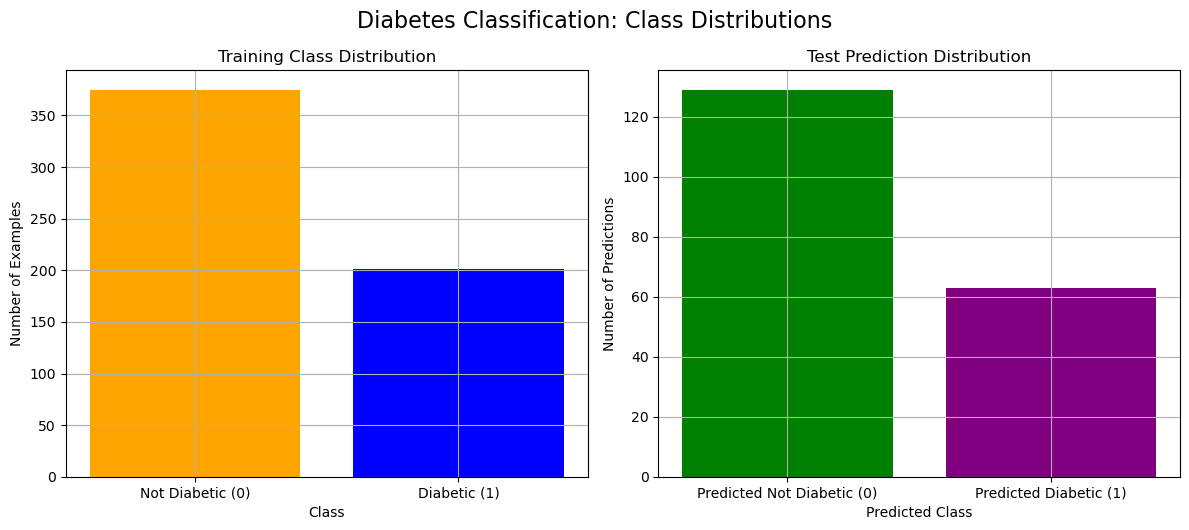

In [9]:
# Count training labels
train_counts = Counter(Y_train)
# Count predicted labels
pred_counts = Counter(Y_pred)

# Create a single figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Training class distribution
ax1.bar(train_counts.keys(), train_counts.values(), color=['blue', 'orange'])
ax1.set_xticks([0, 1])
ax1.set_xticklabels(['Not Diabetic (0)', 'Diabetic (1)'])
ax1.set_title('Training Class Distribution')
ax1.set_xlabel('Class')
ax1.set_ylabel('Number of Examples')
ax1.grid(True)

# Test prediction distribution
ax2.bar(pred_counts.keys(), pred_counts.values(), color=['purple', 'green'])
ax2.set_xticks([0, 1])
ax2.set_xticklabels(['Predicted Not Diabetic (0)', 'Predicted Diabetic (1)'])
ax2.set_title('Test Prediction Distribution')
ax2.set_xlabel('Predicted Class')
ax2.set_ylabel('Number of Predictions')
ax2.grid(True)

# Display both plots in one grouped window
plt.tight_layout()
plt.suptitle('Diabetes Classification: Class Distributions', fontsize=16, y=1.05)
plt.show()